**REGRESION MULTIVARIABLE**

In [1]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt



Carga y exploración de datos

In [2]:
# Carga los datos desde un archivo CSV
data = pd.read_csv('datasets/day1.csv')

# Visualiza las primeras filas del conjunto de datos
print(data.head())



   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01.01.2018       1   0     1        0        6           0   
1        2  02.01.2018       1   0     1        0        0           0   
2        3  03.01.2018       1   0     1        0        1           1   
3        4  04.01.2018       1   0     1        0        2           1   
4        5  05.01.2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [3]:
# Realiza análisis exploratorio de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Preprocesamiento de datos

Realiza cualquier preprocesamiento necesario, como la eliminación de valores nulos, la codificación de variables categóricas y la normalización de datos.

In [4]:
#Convierte las variables categoricas en numericas 
columnas_categoricas = data.select_dtypes(include=['object']).columns
# Convierte las variables tipo fechas en numericas
columnas_fechas = data.select_dtypes(include=['datetime64']).columns

In [5]:

#Procesamiento de frases o palabras
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [6]:
# procesamiento de Fechas a numeros
for columna in columnas_fechas:
  data[columna] = pd.to_numeric(data[columna].map(datetime.timestamp))

In [7]:
# Realiza análisis exploratorio de datos

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    int32  
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int32(1), int64(11)
memory usage: 88.5 KB


In [8]:
# Elimina filas con valores nulos (si es necesario)
data = data.dropna()

# Divide el conjunto de datos en características (X) y variable objetivo (y)
X = data.iloc[:, :15]
y = data.iloc[:, 15]

# Normaliza las características (opcional pero generalmente recomendado)
scaler = StandardScaler()
X = scaler.fit_transform(X)


División del conjunto de datos

Divide el conjunto de datos en conjuntos de entrenamiento y prueba.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Conversion de datos de Numpy a tensores de Pytorch** para asegurar la compatibilidad con las operaciones y modelos de PyTorch, permitiendo el cálculo de gradientes durante el entrenamiento, lo que es esencial para el aprendizaje automático, y para aprovechar eficientemente la aceleración de hardware, como las GPUs, mientras se mantiene la flexibilidad de trabajar con datos en NumPy cuando sea necesario.

In [10]:
# Convertir tus datos de NumPy a tensores de PyTorch
X_train_tensor = torch.Tensor(X_train)
y_train_tensor = torch.Tensor(y_train)


Definición del modelo de regresión

Define tu modelo de regresión multivariable utilizando PyTorch.

In [11]:
# Define la clase RegresionMultivariable que hereda de nn.Module
class RegresionMultivariable(nn.Module):
    def __init__(self, input_dim):
        super(RegresionMultivariable, self).__init__()
        self.fc = nn.Linear(input_dim, 1)  # 1 salida para la regresión

    def forward(self, x):
        return self.fc(x)

# Crea una instancia del modelo
input_dim = X_train.shape[1]
modelo = RegresionMultivariable(input_dim)


Entrenamiento del modelo

Entrena tu modelo utilizando los datos de entrenamiento.

In [12]:
# Inicializa una lista para almacenar las pérdidas en cada época
lista_perdidas = []
# Define la función de pérdida (en este caso, error cuadrático medio)
criterio = nn.MSELoss()

# Define el optimizador (en este caso, descenso por el gradiente estocástico)
optimizador = optim.SGD(modelo.parameters(), lr=0.01)

# Entrenamiento del modelo utilizando descenso por el gradiente
num_epochs = 800  # Número de épocas de entrenamiento
for epoch in range(num_epochs):
    # Paso 1: Realizar la predicción
    predicciones = modelo(X_train_tensor)

    # Paso 2: Calcular la pérdida
    perdida = criterio(predicciones, y_train_tensor)

    # Paso 3: Realizar el descenso por el gradiente
    optimizador.zero_grad()  # Reiniciar los gradientes
    perdida.backward()  # Calcular gradientes
    optimizador.step()  # Actualizar parámetros
    # Registra la pérdida en la lista
    lista_perdidas.append(perdida.item())

    # Imprimir la pérdida en cada época
    if (epoch + 1) % 100 == 0:
        print(f'Época [{epoch+1}/{num_epochs}], Pérdida: {perdida.item():.4f}')

# Una vez finalizado el entrenamiento, tu modelo ha sido optimizado

c:\Users\micky\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([584])) that is different to the input size (torch.Size([584, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Época [100/800], Pérdida: 4204775.5000


Época [200/800], Pérdida: 3823961.0000
Época [300/800], Pérdida: 3816314.5000
Época [400/800], Pérdida: 3815954.0000
Época [500/800], Pérdida: 3815835.5000
Época [600/800], Pérdida: 3815772.5000
Época [700/800], Pérdida: 3815738.0000
Época [800/800], Pérdida: 3815718.5000


Grafica de la convergencia del costo durante el entrenamiento, se registra la pérdida (loss) en cada época y luego se traza esta información.

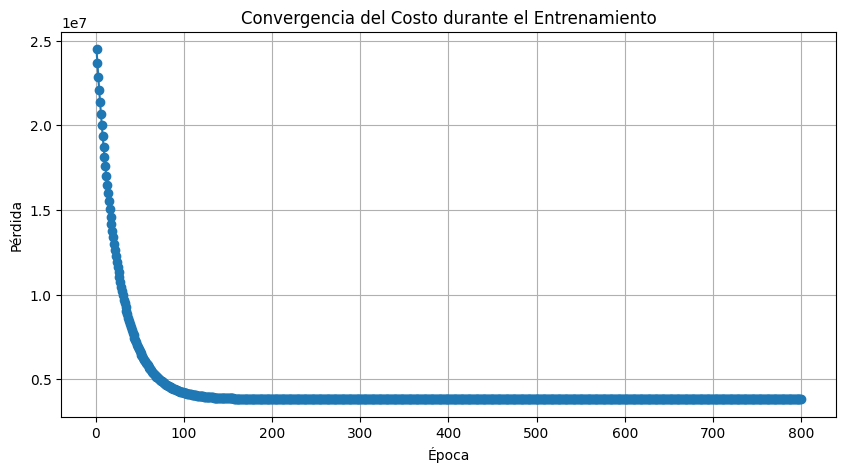

In [13]:
# Trazar la gráfica de la convergencia del costo
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), lista_perdidas, marker='o', linestyle='-')
plt.title('Convergencia del Costo durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.grid(True)
plt.show()


Evaluación del modelo

Evalúa el rendimiento del modelo en el conjunto de prueba.

In [14]:
# Crear tensores de PyTorch a partir de los arrays NumPy
inputs_test = torch.Tensor(X_test)
targets_test = torch.Tensor(y_test.values)  # Convierte la serie de Pandas en un array NumPy

# Cambiar al modo de evaluación
modelo.eval()

with torch.no_grad():
    predictions = modelo(inputs_test)
    mse = criterio(predictions, targets_test)
    print(f'Error cuadrático medio en el conjunto de prueba: {mse.item()}')


Error cuadrático medio en el conjunto de prueba: 3458949.5


c:\Users\micky\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([146])) that is different to the input size (torch.Size([146, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Calcular el porcentaje de error utilizando un ejemplo de predicción real a partir de tus datos de prueba

In [15]:

# Índice del ejemplo específico que deseas utilizar
indice_ejemplo = 22  # Reemplaza con el índice que deseas

# Obtiene el ejemplo específico de X_test y el valor real correspondiente de y_test
ejemplo = X_test[indice_ejemplo]
valor_real = y_test.iloc[indice_ejemplo]

# Realiza una predicción con tu modelo
modelo_prediccion = modelo(torch.Tensor(ejemplo)).item()

# Calcula el error absoluto entre la predicción y el valor real
error_absoluto = abs(modelo_prediccion - valor_real)

# Calcula el porcentaje de error en relación con el valor real
porcentaje_error = (error_absoluto / valor_real) * 100

# Muestra todos los datos del ejemplo con solo dos decimales

print(f"Valor real (y_test): {np.round(valor_real, 2)}")

print(f"Ejemplo de predicción: {np.round(modelo_prediccion, 2)}")
print(f"Error absoluto: {np.round(error_absoluto, 2)}")
print(f"Porcentaje de error: {np.round(porcentaje_error, 2)}%")


Valor real (y_test): 4713
Ejemplo de predicción: 4542.89
Error absoluto: 170.11
Porcentaje de error: 3.61%
